In [460]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans # k-means
from sklearn.mixture import GaussianMixture # EM/GMM
from sklearn.cluster import AgglomerativeClustering # hierarchical agglomerative clustering

from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline 

# 1. Clustering

We've focused on three types of clustering:

* k-means
* EM with Mixtures of Gaussians
* hierarchical (agglomeretive) clustering

We'll use all three types of clustering on our dataset, `data2`. This (fake) data sets contain data about the skill level of different programmers in 5 different langagues: Python, R, C++, SQL, and JavaScript. Higher scores indicate greater levels of mastery in each respective language (negative or 0 scores are valid).

Use `KMeans()`, `GaussianMixture()`, and `AgglomerativeClustering()` to assign clusters to the dataframe `data2`, and answer the following questions. YOU MUST write your responses in markdown cells, and clearly indicate which part (a-g) you are answering.

**a)** For *each* of the 3 clustering algorithms, justify modeling choices you made (such as z-scoring, distance metrics...etc)

**b)** For *each* of the 3 clustering algorithms, how did you choose the number of clusters to use and what is that number?

**c)** For *each* of the 3 clustering algorithms, describe what characterizes each cluster, and provide your own interpretation (for example: "this cluster has people who ____________, which might mean this group is people who are web developers")

**d)** Are cluster assignments similar between the 3 methods (i.e. are data points that are clustered together in one algorithm typically clustered together in another)? Explain in detail how you checked. Use ggplot to make a data visualization to help support your conclusion.

**e)** For *each* of the 3 clustering algorithms, create 1 ggplot graph that you think best show the differences between the clusters generated by that algorithm. Write a caption for each graph explaining what it is showing.

**f)** For your Hierarchical Clustering, plot the dendrogram and explain what the dendrogram tells you about the results.

**g)** Explain the differences between the 3 types of clustering, and explain which method you think would be best for this dataset and why.


You will be graded on the correctness/elegance of your code, and the completeness and clarity of your written responses.

In [461]:
data2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/programmers2.csv")
data2.head()

,py,r,c,sql,js
0,103.709584,76.609626,27.205792,24.470920,-15.009292
1,84.353018,71.080805,26.268507,4.829917,8.337772
2,93.631284,82.878638,13.980748,40.173204,16.713251
3,96.328626,78.214497,31.090891,21.442606,25.595392
4,94.042683,75.448803,15.999360,18.918011,-8.768616


### K- Means

#### Build and Explore Model ####

In [462]:
features = ["py", "r", "c", "sql", "js"]

x = data2[features]

z = StandardScaler()

x[features] = z.fit_transform(x)

In [463]:
km = KMeans(n_clusters = 4)
km.fit(x)

mastery = km.predict(x)

In [464]:
silhouette_score(x, mastery)

0.6439464484295797

##### Optimal n for highest silhouette_score: n = 4, then n = 5, then n = 6, then n = 3 #####

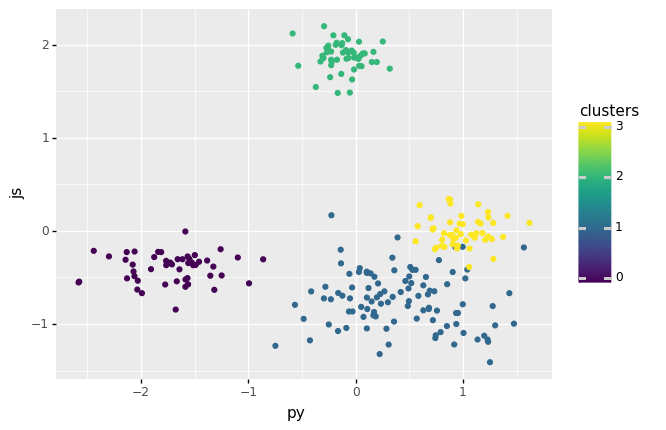

<ggplot: (8769803428241)>

In [465]:
x["clusters"] = mastery
(ggplot(x, aes("py", "js", color = "clusters")) + geom_point())

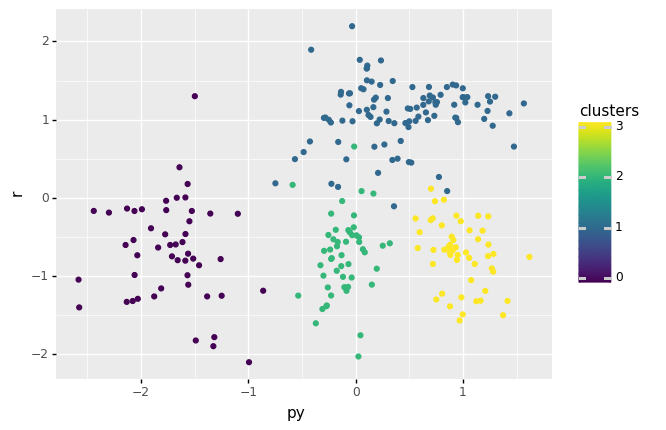

<ggplot: (8769805574045)>

In [466]:
(ggplot(x, aes("py", "r", color = "clusters")) + geom_point())

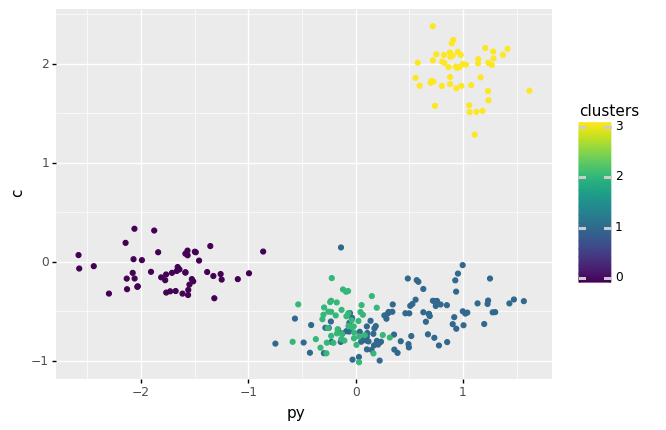

<ggplot: (8769804310146)>

In [467]:
(ggplot(x, aes("py", "c", color = "clusters")) + geom_point())

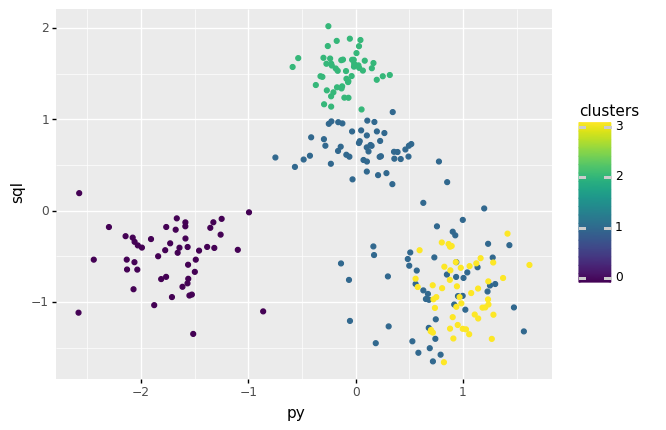

<ggplot: (8769804675066)>

In [468]:
(ggplot(x, aes("py", "sql", color = "clusters")) + geom_point())

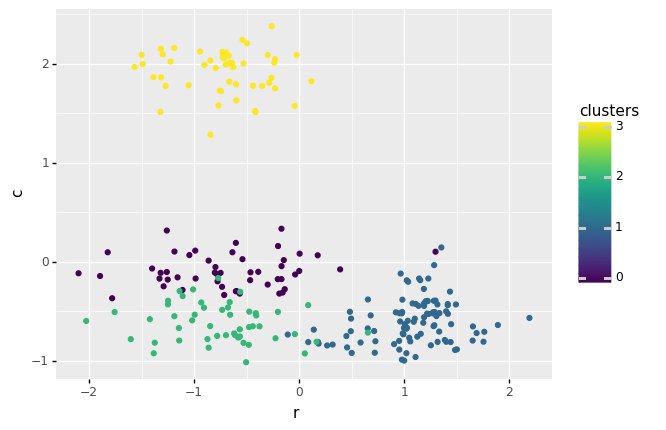

<ggplot: (8769805528474)>

In [469]:
(ggplot(x, aes("r", "c", color = "clusters")) + geom_point())

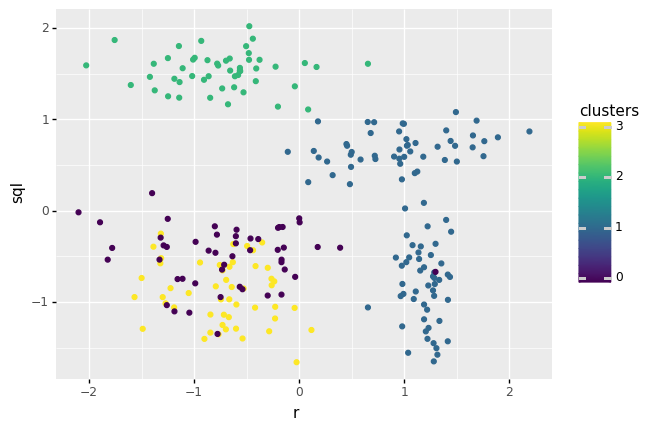

<ggplot: (8769804944553)>

In [470]:
(ggplot(x, aes("r", "sql", color = "clusters")) + geom_point())

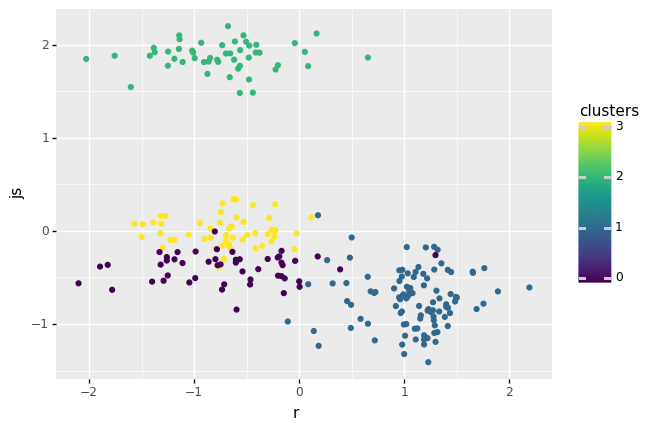

<ggplot: (8769805144369)>

In [471]:
(ggplot(x, aes("r", "js", color = "clusters")) + geom_point())

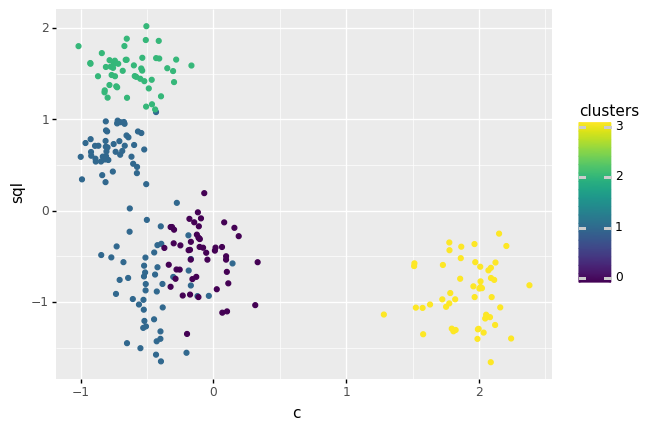

<ggplot: (8769797693748)>

In [472]:
(ggplot(x, aes("c", "sql", color = "clusters")) + geom_point())

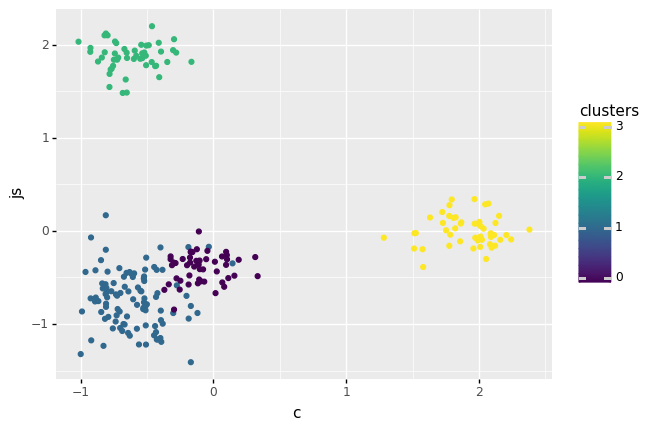

<ggplot: (8769805618294)>

In [473]:
(ggplot(x, aes("c", "js", color = "clusters")) + geom_point())

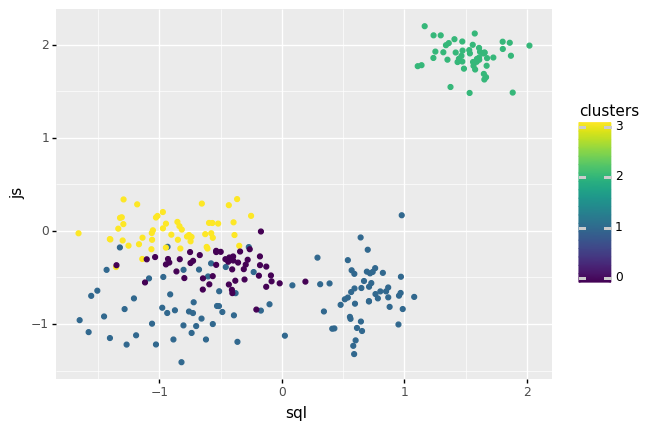

<ggplot: (8769803364828)>

In [474]:
(ggplot(x, aes("sql", "js", color = "clusters")) + geom_point())

The ggplots above indicates the differences between the clusters based on the features. Using it, we can visually see the relationship of the cluster to the factors, giving an insightful look at the factors associated with each cluster. 

### Empirical Method ###

In [475]:
datatwo = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/programmers2.csv")
datatwo.head()

,py,r,c,sql,js
0,103.709584,76.609626,27.205792,24.470920,-15.009292
1,84.353018,71.080805,26.268507,4.829917,8.337772
2,93.631284,82.878638,13.980748,40.173204,16.713251
3,96.328626,78.214497,31.090891,21.442606,25.595392
4,94.042683,75.448803,15.999360,18.918011,-8.768616


In [476]:
featuresem = ["py", "r", "c", "sql", "js"]

X = datatwo[featuresem]

z = StandardScaler()

X[featuresem] = z.fit_transform(X)

In [477]:
EM = GaussianMixture(n_components = 4)
EM.fit(X)

GaussianMixture(n_components=4)

In [478]:
cluster = EM.predict(X) 
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [479]:
silhouette_score(X, cluster)

0.6439464484295797

In [480]:
EM.predict_proba(X)

array([[5.65733001e-166, 1.00000000e+000, 6.24385831e-029,
        3.04582534e-040],
       [2.44565879e-142, 1.00000000e+000, 8.63053536e-015,
        1.50796344e-026],
       [2.09887373e-087, 1.00000000e+000, 3.00352638e-017,
        5.83835610e-038],
       [1.11597044e-096, 1.00000000e+000, 5.76795930e-014,
        7.56814565e-020],
       [1.19474804e-156, 1.00000000e+000, 6.87877151e-025,
        1.09403059e-043],
       [1.47001403e-165, 1.00000000e+000, 5.35209537e-023,
        2.38663074e-038],
       [1.80121571e-140, 1.00000000e+000, 1.34777666e-024,
        2.74748042e-040],
       [3.24601501e-155, 1.00000000e+000, 7.76884549e-022,
        3.41198964e-039],
       [1.85399686e-149, 1.00000000e+000, 4.92126855e-024,
        7.65922451e-034],
       [6.02493310e-107, 1.00000000e+000, 1.14799113e-016,
        8.79860325e-038],
       [1.89746730e-151, 1.00000000e+000, 1.87771066e-025,
        5.04917092e-040],
       [1.93185552e-117, 1.00000000e+000, 2.51772386e-021,
      

In [481]:
X["cluster"] = cluster

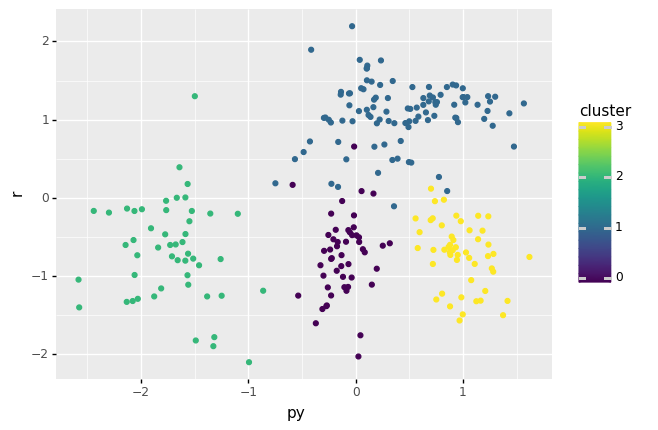

<ggplot: (8769805767147)>

In [482]:
(ggplot(X, aes(x = "py", y = "r", color = "cluster")) + geom_point())

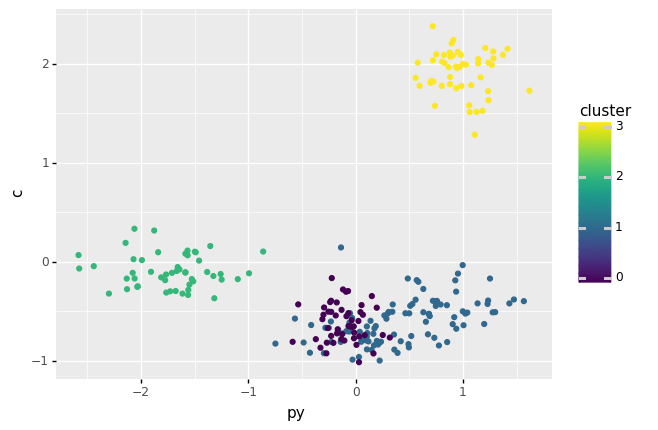

<ggplot: (8769803421341)>

In [483]:
(ggplot(X, aes(x = "py", y = "c", color = "cluster")) + geom_point())

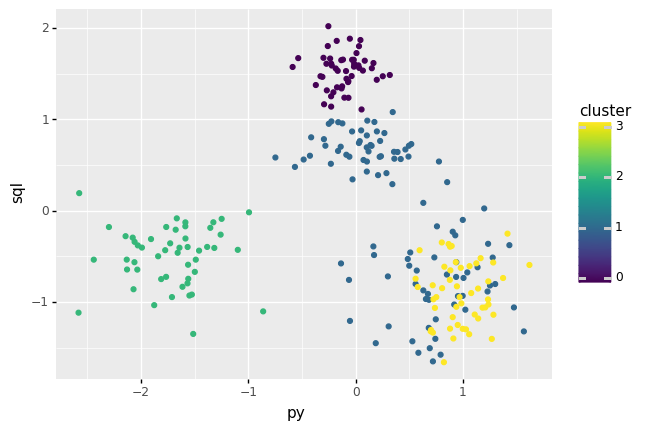

<ggplot: (8769804233072)>

In [484]:
(ggplot(X, aes(x = "py", y = "sql", color = "cluster")) + geom_point())

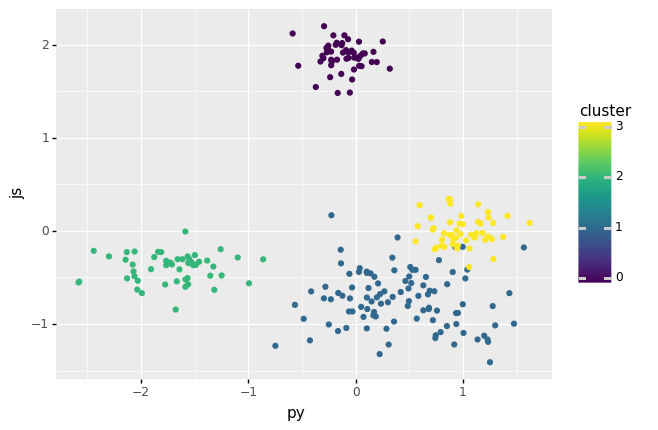

<ggplot: (8769804593634)>

In [485]:
(ggplot(X, aes(x = "py", y = "js", color = "cluster")) + geom_point())

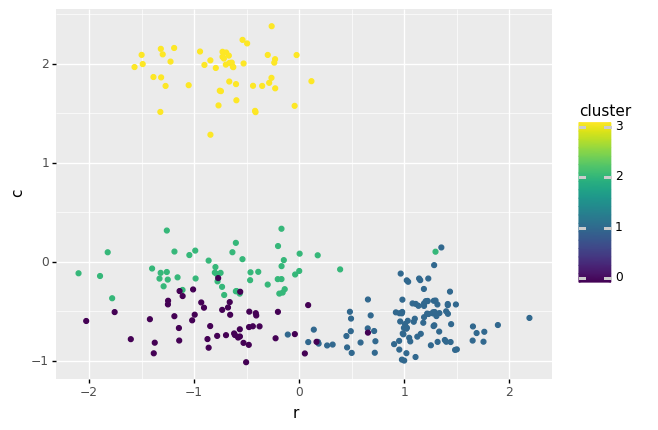

<ggplot: (8769804456090)>

In [486]:
(ggplot(X, aes(x = "r", y = "c", color = "cluster")) + geom_point())

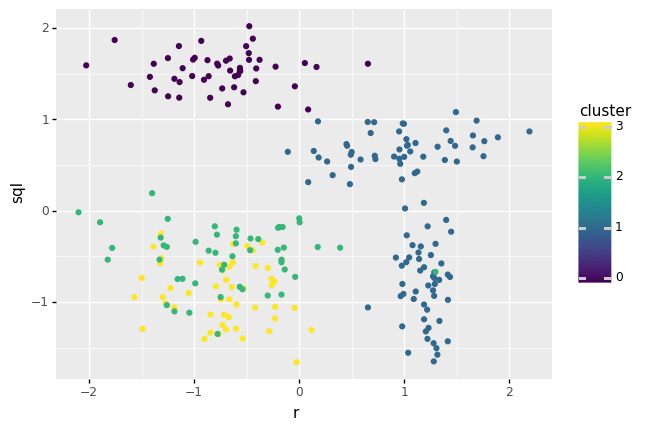

<ggplot: (8769805121293)>

In [487]:
(ggplot(X, aes(x = "r", y = "sql", color = "cluster")) + geom_point())

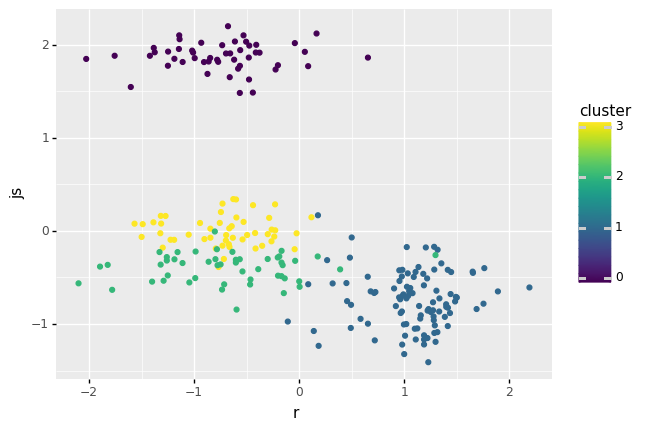

<ggplot: (8769804364538)>

In [488]:
(ggplot(X, aes(x = "r", y = "js", color = "cluster")) + geom_point())

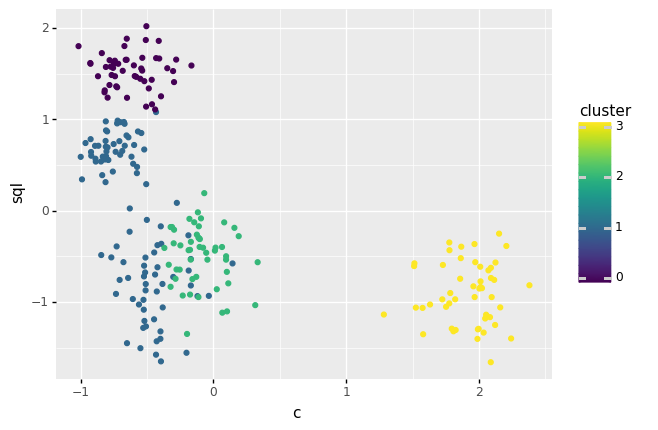

<ggplot: (8769804427686)>

In [489]:
(ggplot(X, aes(x = "c", y = "sql", color = "cluster")) + geom_point())

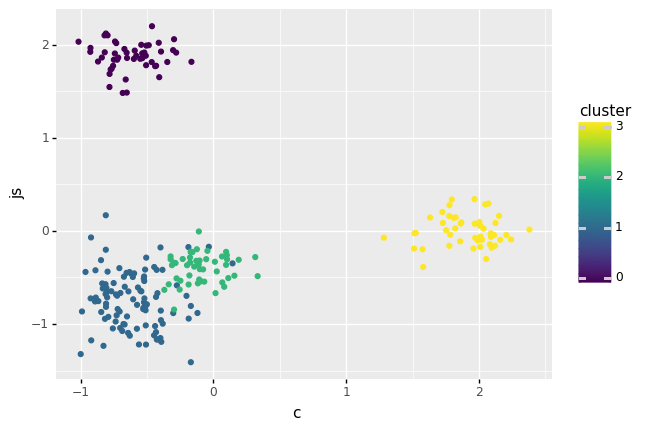

<ggplot: (8769804430749)>

In [490]:
(ggplot(X, aes(x = "c", y = "js", color = "cluster")) + geom_point())

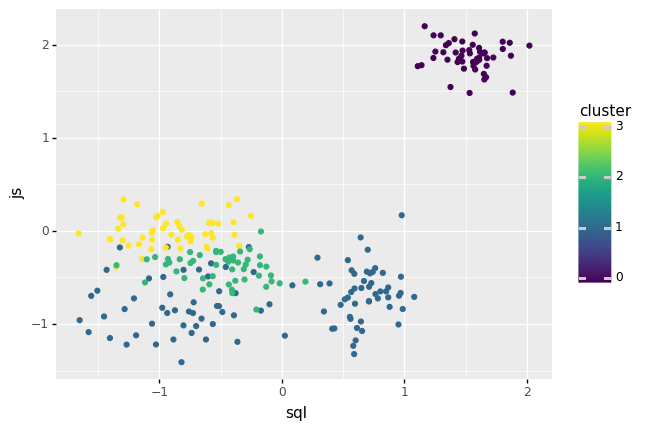

<ggplot: (8769804574025)>

In [491]:
(ggplot(X, aes(x = "sql", y = "js", color = "cluster")) + geom_point())

The ggplots above show the scatterplot that displays the clusters and the relativity towards certain factors, which were the languages. In it, we can see the different languages and their correlation to the different clusters, indicating how the factors affected cluster formation. 

### Hierarchal (Agglomeritive) Clustering ###

In [492]:
data_two = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/programmers2.csv")
data_two.head()

,py,r,c,sql,js
0,103.709584,76.609626,27.205792,24.470920,-15.009292
1,84.353018,71.080805,26.268507,4.829917,8.337772
2,93.631284,82.878638,13.980748,40.173204,16.713251
3,96.328626,78.214497,31.090891,21.442606,25.595392
4,94.042683,75.448803,15.999360,18.918011,-8.768616


In [493]:
hac_features = ["py", "r", "c", "sql", "js"] 

x = data_two[hac_features]

z = StandardScaler()

x[hac_features] = z.fit_transform(x)

hac = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")

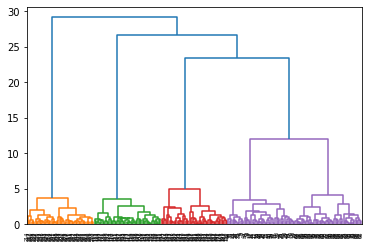

In [494]:
hac.fit(x)

dendro = sch.dendrogram(sch.linkage(x, method = "ward", metric = "euclidean"))

In [495]:
membership = hac.labels_
membership

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

In [496]:
silhouette_score(x, membership)

0.6439464484295797

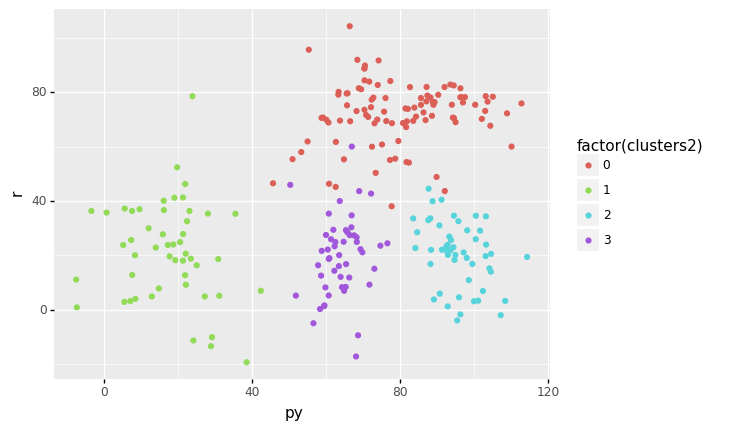

<ggplot: (8769805767111)>

In [497]:
data_two["clusters2"] = membership

(ggplot(data_two, aes(x = "py", y = "r", color = "factor(clusters2)")) + geom_point())

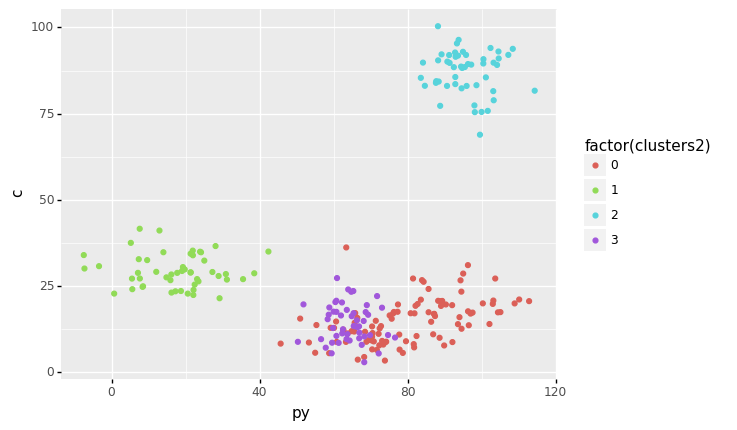

<ggplot: (8769805136701)>

In [498]:
(ggplot(data_two, aes(x = "py", y = "c", color = "factor(clusters2)")) + geom_point())

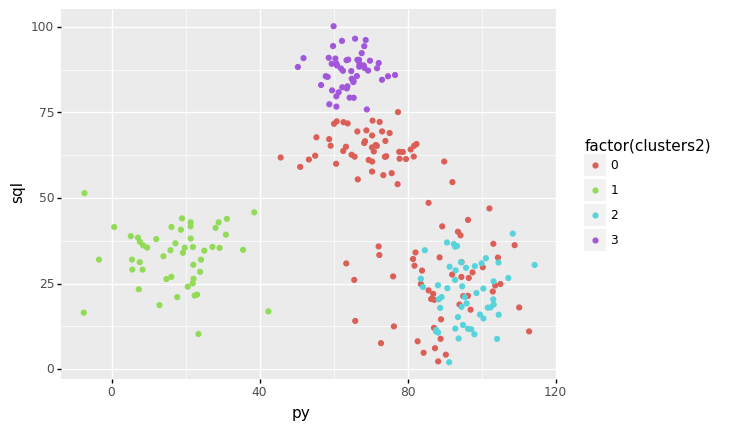

<ggplot: (8769803378993)>

In [499]:
(ggplot(data_two, aes(x = "py", y = "sql", color = "factor(clusters2)")) + geom_point())

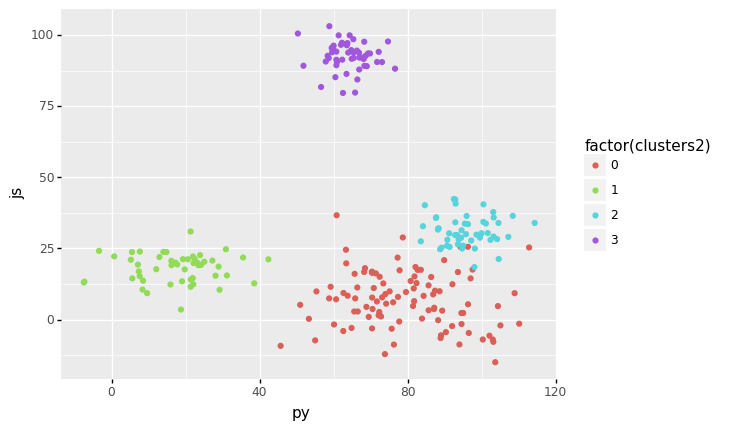

<ggplot: (8769804228356)>

In [500]:
(ggplot(data_two, aes(x = "py", y = "js", color = "factor(clusters2)")) + geom_point())

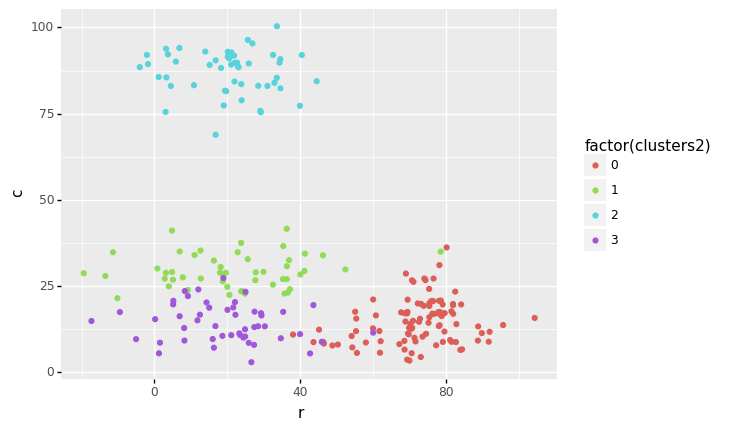

<ggplot: (8769805785332)>

In [501]:
(ggplot(data_two, aes(x = "r", y = "c", color = "factor(clusters2)")) + geom_point())

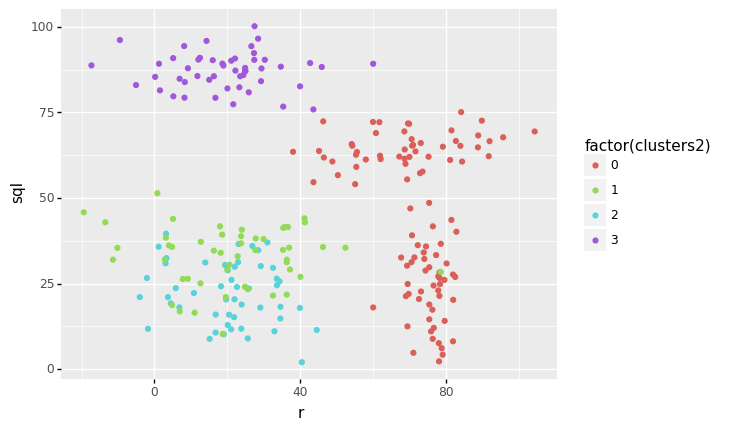

<ggplot: (8769805769524)>

In [502]:
(ggplot(data_two, aes(x = "r", y = "sql", color = "factor(clusters2)")) + geom_point())

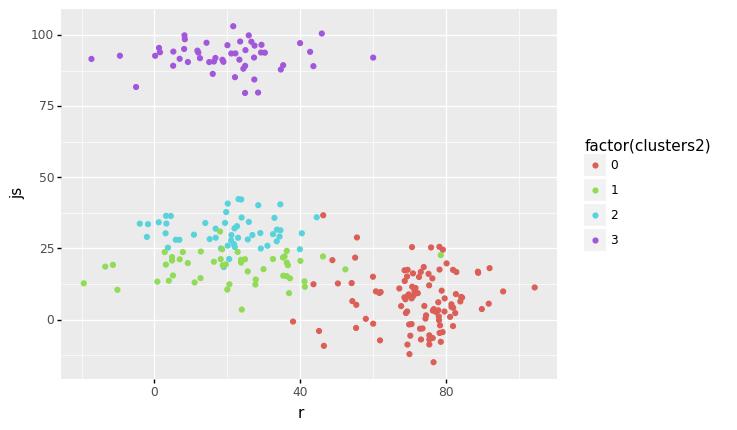

<ggplot: (8769805531796)>

In [503]:
(ggplot(data_two, aes(x = "r", y = "js", color = "factor(clusters2)")) + geom_point())

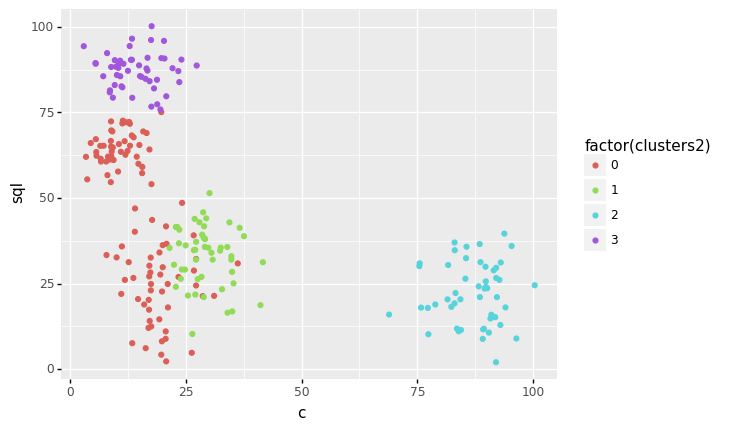

<ggplot: (8769804778894)>

In [504]:
(ggplot(data_two, aes(x = "c", y = "sql", color = "factor(clusters2)")) + geom_point())

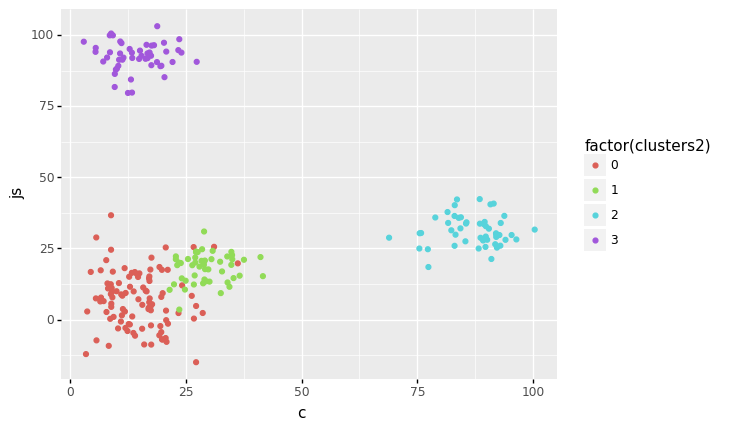

<ggplot: (8769805531874)>

In [505]:
(ggplot(data_two, aes(x = "c", y = "js", color = "factor(clusters2)")) + geom_point())

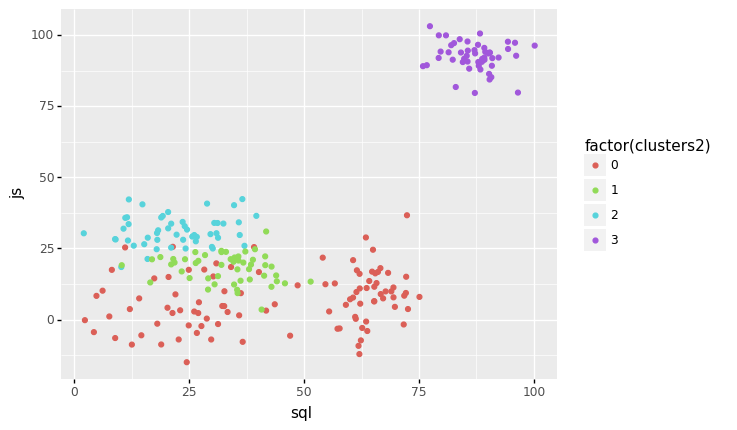

<ggplot: (8769804315447)>

In [506]:
(ggplot(data_two, aes(x = "sql", y = "js", color = "factor(clusters2)")) + geom_point())

The ggplots above show the differences in the metrics data for each cluster, for each factor. This is helpful to see which clusters have correlation to a certain language and to see what cluster is associated with being more proficient in certain languages. 

# Responses #

a)

- KM: I chose to do 4 clusters for the 5 factors that I chose to use. I utilized all 5 factors despite being hard to visualize the model because the model looks at the overall skill in the different languages, and the data was fairly seperable when looking at the silhouette score. I z-scored all these variables, as it is optimal for k-means as the clusters are spherical shaped, and helps to lessen any overly high variance, making all the factors be on a relative scale. 
- EM: I chose to do 4 clusters for the 5 factors that I chose to use. I felt 5 factors was optimal because it would've been more difficult to group the factors individually as (2,3) or (3,2). I z-scored the variables to put them on the same scale when creating my model. I z-scored all of these variables to lessen the overall variance, as the Gaussian does take into account variance in the model.
- HAC: I chose to do 4 clusters for the 5 factors that I chose to use. I felt that the five factors was perfect for the hierachcal nature of the HAC and I z-scored all of the variables to put them on the same scale to lessen the variance. 

b)
- KM: When deciding on my clusters, I primarily looked at the silhouette score to see how the model did, and when shifting the clusters between 2 and 10, the optimal silhouette score came when constructing 4 clusters for the model. I used 4 clusters for my K-Means model. 
- EM: When deciding clusters, I looked at the silhouette score to determine how many clusters would produce the highest silhouette score and after checking, 4 clusters returned the highest silhouette score, which signifies the optimal clusters to use for the model.
- HAC: When deciding clusters, I looked at the silhouette score to determine how many clusters would produce the highest silhouette score and the 4 clusters returned the highest silhouette score. 

c)
#### KM: 
-   Cluster 0: This cluster has people who have a strength in c and py, which might mean this cluster contains people that are in game development, engineers, or developers.
-   Cluster 1: This cluster has people who have a strength in js and sql, which might mean this cluster contains people that are in website development. 
-   Cluster 2: This cluster has people who have a strength in py, r, and sql, which might mean this group is people that are in database management, data science, or data analysis.
-   Cluster 3: This cluster has people who have an average ability in all the languages, which might mean this cluster contains college students learning a variety of languages or others who have an array of experiences in all the languages. These people wouldn't be experts in a language, but pretty comfortable using all of them.
#### EM:
-   Cluster 0: This cluster has people who have a strength in r, py, and sql, which might mean this group is people that are in database management, data science, or data analysis.
-   Cluster 1: This cluster has people who have a strength in js and sql, which might mean this cluster contains people that are in website development. 
-   Cluster 2: This cluster has people who have an average ability in all the languages, which might mean this cluster contains college students learning a variety of languages or others who have an array of experiences in all the languages. These people wouldn't be experts in a language, but pretty comfortable using all of them.
-   Cluster 3: This cluster has people who have a strength in c and py which might mean this cluster contains people that are in game development, engineers, or developers. 
#### HAC:
-   Cluster 0: This cluster has people who have a high ability in py, sql, and r, which might mean this group is people that are in database management, data science, or data analysis.
-   Cluster 1: This cluster has people who have a rounded, average ability in all 5 of the languages, so potentially college students learning a lot of different areas or others who have an array of experience using all the languages. They would have some experience, but wouldn't have a good grasp of the specific language.
-   Cluster 2: This cluster has people who excel in c and py, which might mean this cluster contains people that are in game development, engineers, or developers. 
-   Cluster 3: This cluster has people who excel in js and sql, which might mean this cluster contains people that are in website development.

d) Yes, the cluster assignments between the three methods are similar, and I was able to see this when comparing the different ggplots that I constructed for each feature. In that, I was able to see the relationship and the cluster recognizer for each, staying pretty consistent throughout the three models. 

e) The ggplots and captions are above, in the code.

f) Below is the dendrogram for the model. Looking at the dendrogram, the model looks pretty cohesive, as there is a high density towards the bottom of the graph and fairly non-dense at the top, meaning that the clusters are pretty seperate, and given the high density at the bottom, is pretty cohesive. 

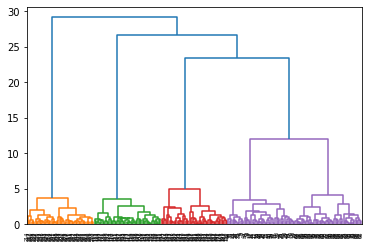

In [507]:
dendro = sch.dendrogram(sch.linkage(x, method = "ward", metric = "euclidean"))

g) Since the silhouette score for all three models are the same, looking at the individual models can explain which model would be the best. As the K-Means and Gaussian both have spherical cluster, their models are optimal for z-scoring but lack in terms of visualization, as the amount of clusters means that the visualization would be in the 4th dimension, something difficult to visualize. However, when looking at the HAC method, it focuses on a hierarchal relationship, which can be shown visually with the dendrogram. In terms of computational efficiency, large sets of data affect efficiency due to being hierarchal, taking a longer period of time. This means that the non-hierarchal, sperical methods of K-Means and Gaussian would perform better than the HAC method. Of the two, Gaussian takes into account variance and the data is given a soft assignment, versus K-Means which would give you a hard assignment while also not taking into account variance. This means that the Gaussian would be the most optimal method to use for this data set. 